# Part 1 : Supervised Learning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
df_train = pd.read_csv('data/Supervised/train.csv')
df_test = pd.read_csv('data/Supervised/test.csv')

We want to know how to estimate price of mobiles.s.

We wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price.
In this problem we will a price range indicating how high the price is

In [5]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data visualization and Analysis

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


How battery power is affected by price ?

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

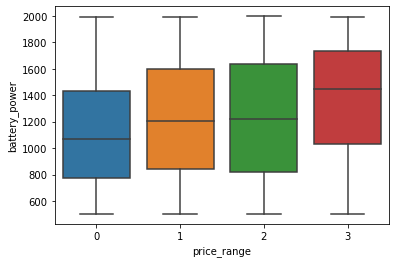

In [8]:
sns.boxplot(x="price_range", y="battery_power", data=df_train)

How many phones support bluetooth ?

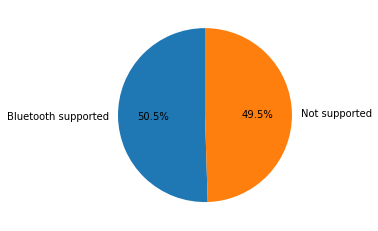

In [9]:
labels = ["Bluetooth supported",'Not supported']
values= df_train['blue'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

How many phones support wifi ?

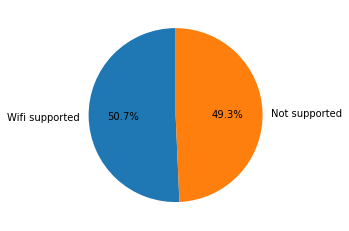

In [10]:
labels = ["Wifi supported",'Not supported']
values= df_train['wifi'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

How many phones support dual-sim ?

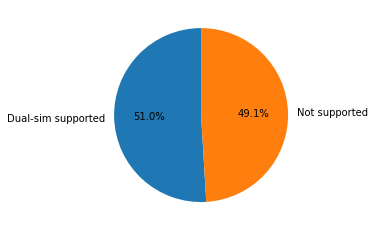

In [11]:
labels = ["Dual-sim supported",'Not supported']
values= df_train['dual_sim'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

How many phones have front and primary camera ? With how many MegaPixels ?

Text(0.5, 0, 'MegaPixels')

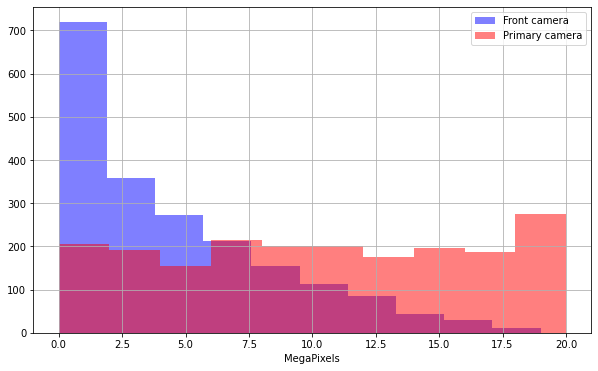

In [12]:
plt.figure(figsize=(10,6))
df_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

How many phones support 3G ?

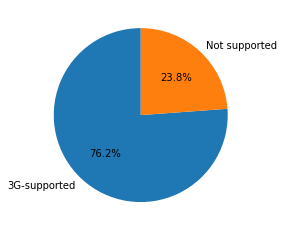

In [13]:
labels = ["3G-supported",'Not supported']
values= df_train['three_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

How many phones support 4G ?

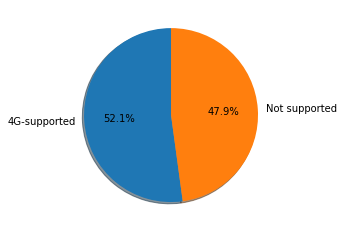

In [14]:
labels4g = ["4G-supported",'Not supported']
values4g = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

How numbers of cpu is affected by price ?

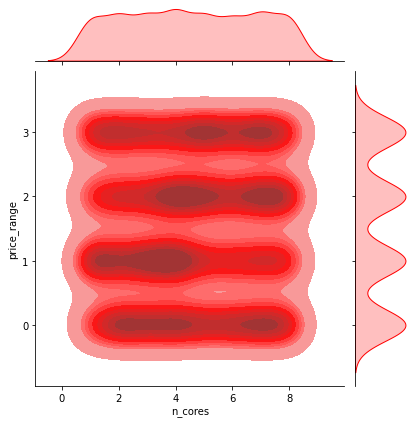

In [15]:
sns.jointplot(x='n_cores', y='price_range',data=df_train ,color='red', kind= 'kde', fill=True);

<AxesSubplot:xlabel='price_range', ylabel='n_cores'>

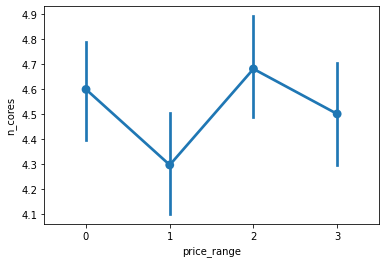

In [16]:
sns.pointplot(x="price_range", y="n_cores", data=df_train)

How phones' weight is affected by price ?

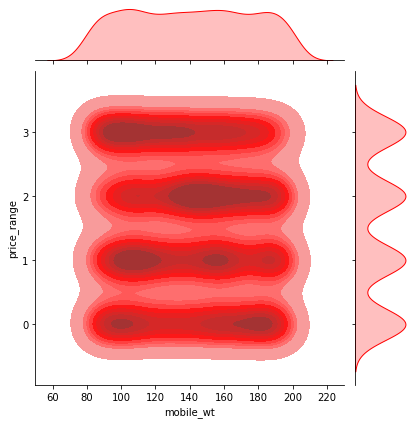

In [17]:
sns.jointplot(x='mobile_wt',y='price_range',data=df_train, color='red', kind='kde', fill=True);

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

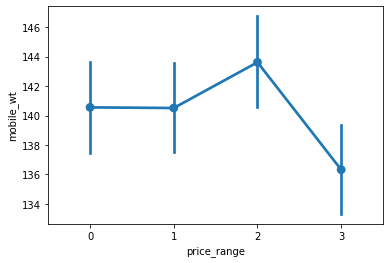

In [18]:
sns.pointplot(x="price_range", y="mobile_wt", data=df_train)

How phones' resolution is affected by price ?

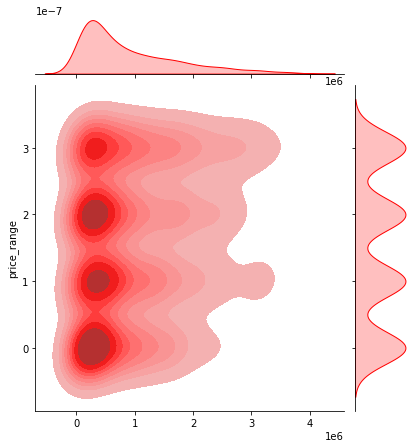

In [19]:
resolution_df = df_train["px_height"] * df_train["px_width"]
sns.jointplot(x=resolution_df, y=df_train["price_range"],color='red', kind= 'kde', fill=True);

<AxesSubplot:xlabel='price_range'>

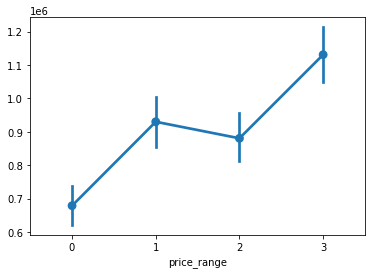

In [20]:
sns.pointplot(x=df_train["price_range"], y=resolution_df, data=df_train)

How internal memory is affected by price ?

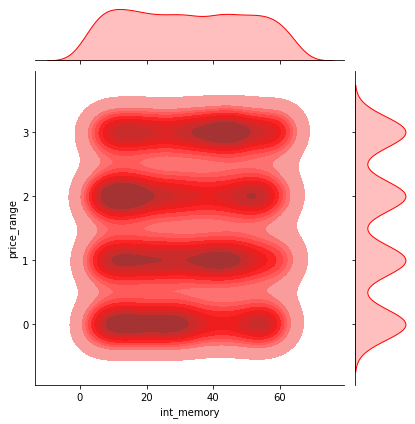

In [21]:
sns.jointplot(x='int_memory', y='price_range',data=df_train ,color='red', kind= 'kde', fill=True);

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

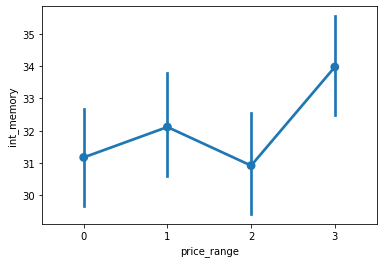

In [22]:
sns.pointplot(x="price_range", y="int_memory", data=df_train)

How does ram is affected by price ?

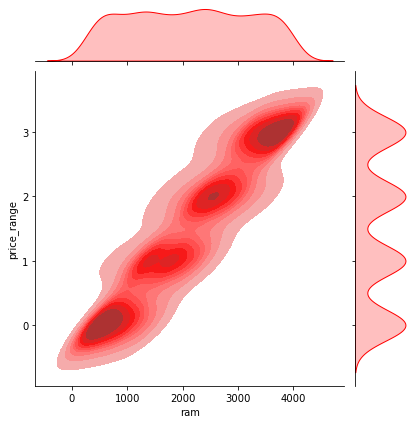

In [23]:
sns.jointplot(x='ram',y='price_range',data=df_train ,color='red',kind= 'kde', fill=True);

<AxesSubplot:xlabel='price_range', ylabel='ram'>

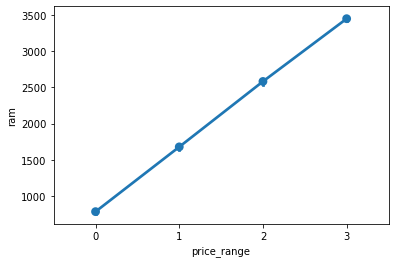

In [24]:
sns.pointplot( x="price_range", y="ram", data=df_train)

How talk time is affected by price ?

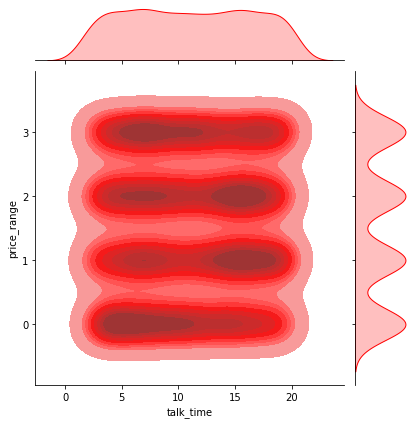

In [25]:
sns.jointplot(x='talk_time',y='price_range',data=df_train ,color='red',kind= 'kde', fill=True);

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

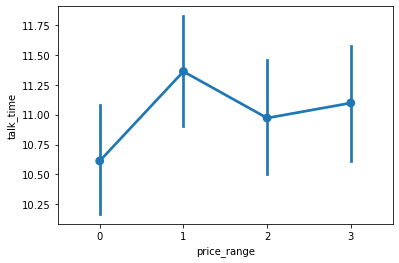

In [26]:
sns.pointplot(x="price_range", y="talk_time", data=df_train)

<AxesSubplot:>

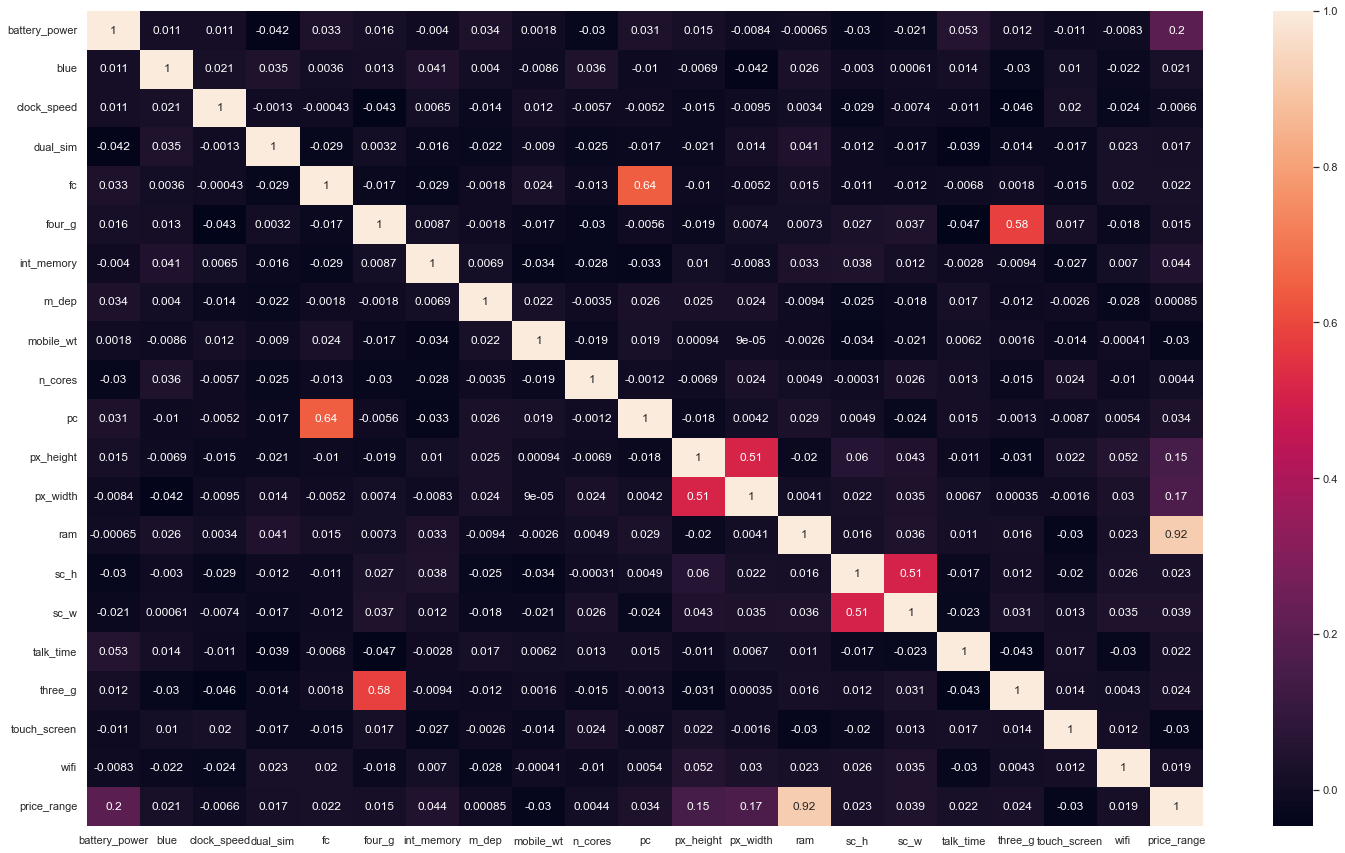

In [27]:
corrMatrix = df_train.corr()
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(corrMatrix, annot=True)

## Outlier Management

We define an outlier of our dataset as a value that is more than 3 standard deviations from the mean.

In [28]:
z_scores = zscore(df_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores >= 3).all(axis=1)
new_df = df_train[filtered_entries]
new_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


There is not outliers in this dataset.

# Machine Learning Part

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Lasso, Perceptron, SGDClassifier, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

We set up the data for the different machine learning algorithm.

In [ ]:
X=df_train.drop('price_range',axis=1)
y=df_train['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
classification_models = {
    "SVC": SVC(),
    "Perceptron" : Perceptron(),
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "SGD" : SGDClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=200),
    "DecisionTree" : DecisionTreeClassifier(),
    "KnnClassifier" : KNeighborsClassifier(n_neighbors=10),
    "XGBoost" : xgb.XGBClassifier(n_jobs=4, random_state=42)
}

classification_scores = {}

def classification_testing(classifier):
    model = classifier[1]
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X, y, cv=10, scoring="r2")
    score = round(scores.mean(), 3)
    print(f"{classifier[0]} score : {score}")
    classification_scores[classifier[0]] = score

for key, value in classification_models.items():
    classification_testing((key, value))
    
for i, classifier in enumerate(classification_scores.items()):
    plt.bar(i, classifier[1], label=classifier[0])
plt.legend()
plt.title("Benchmark of multiple classifier accuracy on given dataset")
plt.show()

# Scoring Models

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

### Scoring on the KNN

In [ ]:
pred = classification_models['KnnClassifier'].predict(X_test)
print(classification_report(y_test, pred))

In [ ]:
matrix = confusion_matrix(y_test, pred)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True, fmt='g')

### Scoring on SVC

In [ ]:
predSVC = classification_models['SVC'].predict(X_test)
print(classification_report(y_test, predSVC))

In [ ]:
matrixSVC = confusion_matrix(y_test,predSVC)
plt.figure(figsize = (10,7))
sns.heatmap(matrixSVC, annot=True, fmt='g')

## Price prediction of test.csv Using KNN for Prediction

In [ ]:
df_test = df_test.drop('id',axis=1)
df_test.head()

In [86]:
predicted_price = knn.predict(df_test)
df_test['price_range'] = predicted_price
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


FIN